In [1]:
import numpy as np #deals with arrays
import matplotlib.pyplot as plt #plotting package
#%matplotlib inline
import xarray as xr #deals with multidimensional arrays
import seaborn as sns; sns.set(color_codes=True) # plotting aes
plt.style.use('ggplot')
import pandas as pd   #builds data frames
from pandas import DataFrame
from pandas import Grouper
import netCDF4 as nc  #deals with nc files
from mpl_toolkits.basemap import Basemap # plots maps
import csv     #outputs data as csv 
%config Completer.use_jedi = False

In [2]:
odata =  xr.open_dataset('/Users/fridaperez/Developer/repos/phase_project/SIC_07132012_01012024.nc')

In [3]:
latitude = odata.GridLat_SpPolarGrid12km
longitude = odata.GridLon_SpPolarGrid12km

In [4]:
ds = xr.open_dataset('/Users/fridaperez/Developer/repos/phase_project/Retreat/comparisons/7d_nan/7d_2012_2023_melt.nc', decode_times=False)
#/Volumes/WorkDrive/melt_dates/NoIceEdge/netcdf/nan_netcdf/merged_years_nan.nc
#/Volumes/WorkDrive/melt_dates/mean/merged_years.nc

In [5]:
ds

<xarray.Dataset>
Dimensions:                        (time: 12, xgrid: 632, ygrid: 664)
Coordinates:
    longitude                      (ygrid, xgrid) float64 ...
    latitude                       (ygrid, xgrid) float64 ...
Dimensions without coordinates: time, xgrid, ygrid
Data variables:
    __xarray_dataarray_variable__  (time, ygrid, xgrid) float32 ...
Attributes:
    history:  Thu Jan 18 11:49:23 2024: ncecat -u time nan_yr12R_7d_15p.nc na...
    NCO:      netCDF Operators version 5.1.0 (Homepage = http://nco.sf.net, C...

In [6]:
days = ds.__xarray_dataarray_variable__

In [7]:
graph= days.mean(dim='time')

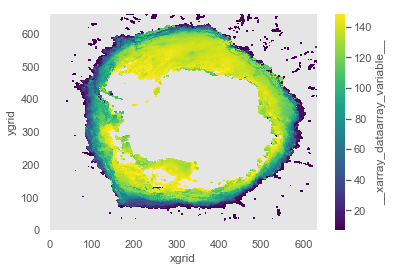

In [8]:
graph.plot()

## Let us get rid of the zeros 

In [9]:
# ice = graph.values
# ice = ice.astype(np.float32)
# ## now that our data is a numpy array, we can convert the zeros and two's into NaNs for a cleaner plot ##
# BU_nan =  ice.copy()
# BU_nan[BU_nan == 0.0] = np.nan
# BU_nan[BU_nan == 1.0] = np.nan
# BU_nan[BU_nan == 2.0] = np.nan
# BU_nan[BU_nan == 3.0] = np.nan
# BU_nan[BU_nan == 4.0] = np.nan
# BU_nan[BU_nan == 5.0] = np.nan


#breakup = xr.DataArray(BU_nan)

In [10]:
# breakup.plot()

In [11]:
breakup = xr.DataArray(graph)

In [12]:
mean = xr.DataArray(breakup)
mean = xr.DataArray(data=breakup,
                     dims=["ygrid","xgrid"],
                     coords=dict(
                         longitudes=(["ygrid","xgrid"],longitude),
                         latitudes=(["ygrid","xgrid"],latitude),
                                ),
                     attrs=dict(description="Sea Ice Breakup Mean",
                               ),
                    )

In [13]:
mean.to_netcdf('/Users/fridaperez/Developer/repos/phase_project/Retreat/Mean_Files/2012_23_mean_xr_7d.nc')